# Homework #2

## Executive Summary

## Loading Data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

2023-04-14 22:08:26.487419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Loading Datasets
network_data_20 = pd.read_csv('DataSets/02-20-2018.csv')
network_data_21 = pd.read_csv('DataSets/02-21-2018.csv')
network_data_22 = pd.read_csv('DataSets/02-22-2018.csv')
network_data_23 = pd.read_csv('DataSets/02-23-2018.csv')

network_data = pd.concat([network_data_20, network_data_21, network_data_22, network_data_23])

In [3]:
#Checking data
print(network_data.shape)

# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((network_data.shape[0])))
print('Number of Columns (Features): %s\n' % str((network_data.shape[1])))

(9853865, 84)
Number of Rows (Samples): 9853865
Number of Columns (Features): 84



In [4]:
# Check the lines of data
print('Head of Data\n')
print(network_data.head())

Head of Data

                                  Flow ID          Src IP  Src Port  \
0  172.31.69.25-94.231.103.172-22-45498-6  94.231.103.172   45498.0   
1                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1       0.0   
2                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1       0.0   
3                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1       0.0   
4                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1       0.0   

         Dst IP  Dst Port  Protocol            Timestamp  Flow Duration  \
0  172.31.69.25        22         6  20/02/2018 08:34:07         888751   
1       8.0.6.4         0         0  20/02/2018 08:33:22      112642816   
2       8.0.6.4         0         0  20/02/2018 08:36:11      112642712   
3       8.0.6.4         0         0  20/02/2018 08:39:00      112642648   
4       8.0.6.4         0         0  20/02/2018 08:41:49      112642702   

   Tot Fwd Pkts  Tot Bwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0            11            

In [5]:
#Checking Each Column
print('Total columns in our data: %s' % str(len(network_data.columns)))

print(network_data.info())

Total columns in our data: 84
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9853865 entries, 0 to 608810
Data columns (total 84 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow ID            object 
 1   Src IP             object 
 2   Src Port           float64
 3   Dst IP             object 
 4   Dst Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow Duration      int64  
 8   Tot Fwd Pkts       int64  
 9   Tot Bwd Pkts       int64  
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       fl

In [6]:
network_data = network_data.dropna(subset=['Label'])
network_data = network_data.fillna(0)

## Data Visualization

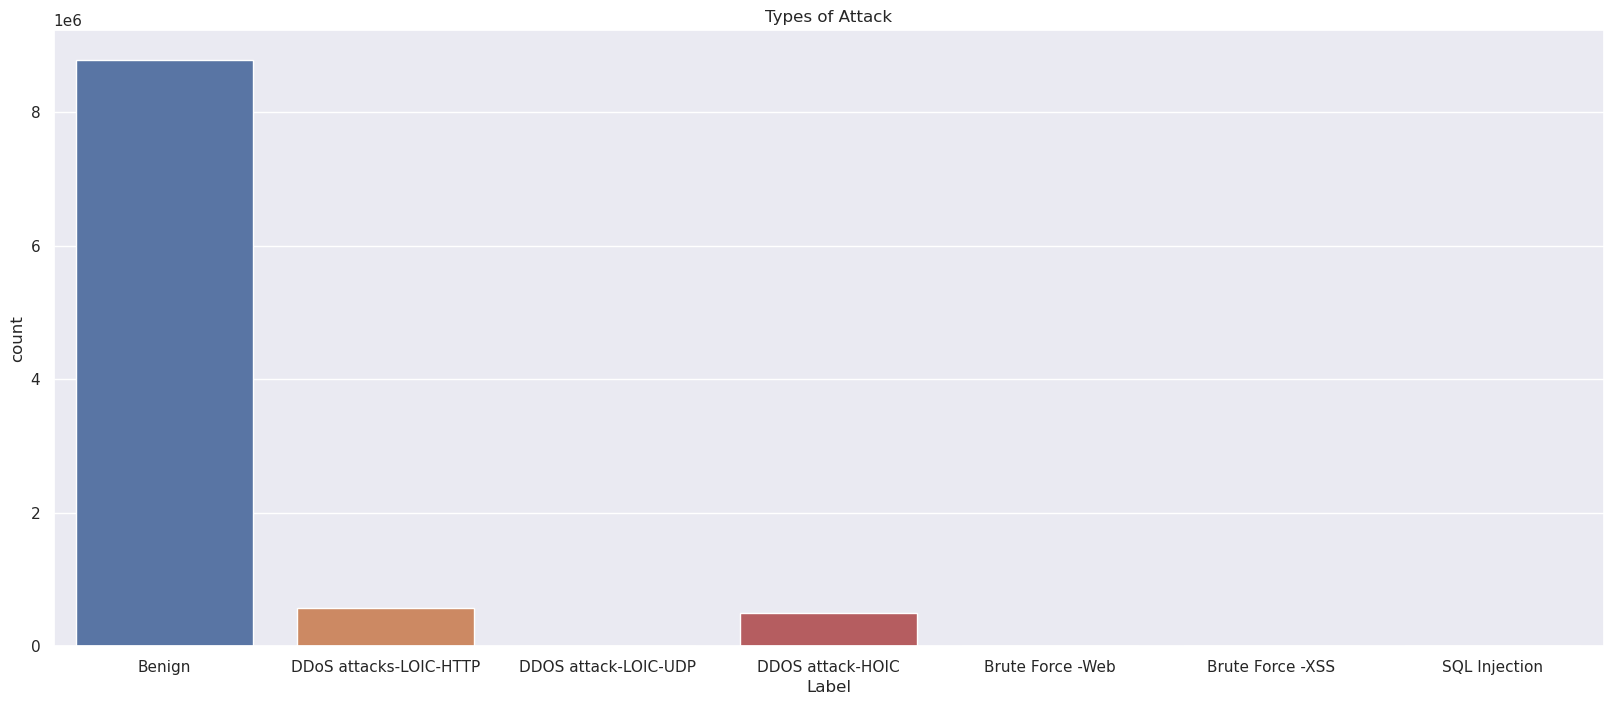

In [7]:
# Plot the Attack Type Amount
sns.set(rc={"figure.figsize":(20, 8)}) #width=20, #height=8
sns.countplot(data=network_data, x="Label").set(title='Types of Attack')
plt.show()

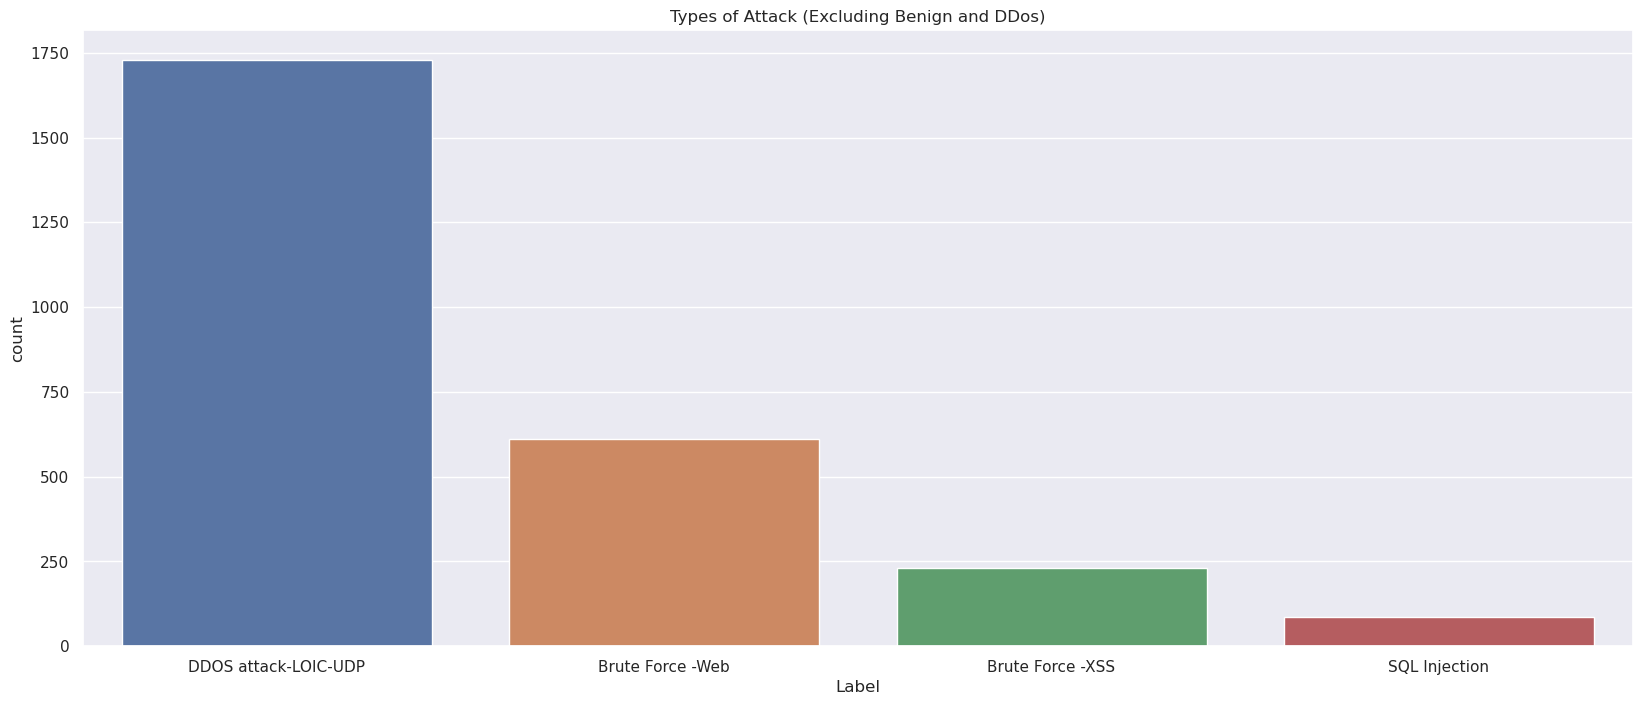

In [8]:
#Plot the lesser seen attacks
sns.countplot(data=network_data[(network_data['Label'] != 'Benign') & (network_data['Label'] != 'DDOS attack-HOIC') & (network_data['Label'] != 'DDoS attacks-LOIC-HTTP')], x='Label').set(title='Types of Attack (Excluding Benign and DDos)')
plt.show()

## Packet Analysis

Knowing the distribution of packet lengths, packet count, and the average rate of packets per second can help detect malicious network traffic such as DDoS attack

#### Packet Lengths

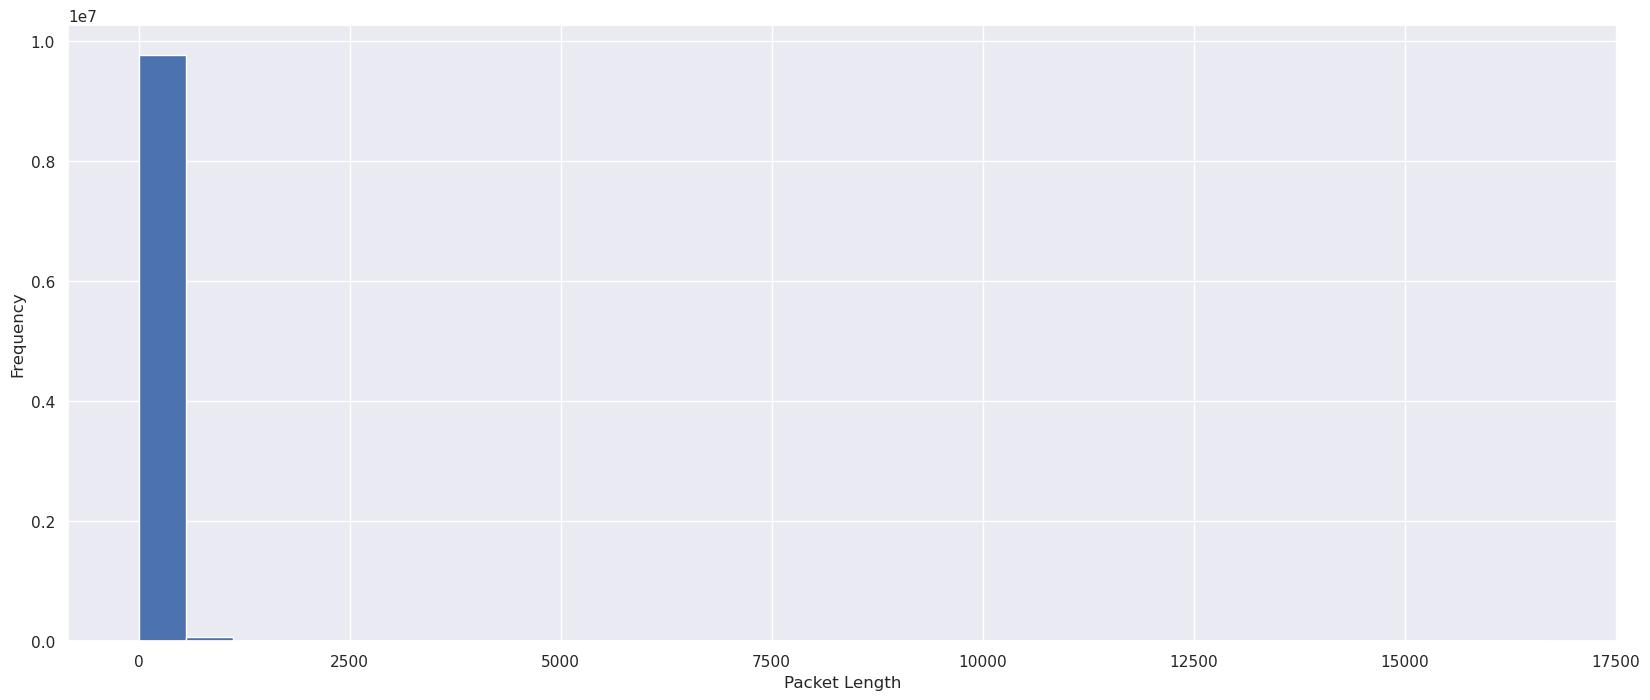

In [9]:
# Create a histogram of the packet lengths
network_data["Pkt Len Mean"].hist(bins=30)

# Set the x-axis label
plt.xlabel("Packet Length")

# Set the y-axis label
plt.ylabel("Frequency")

# Display the histogram
plt.show()

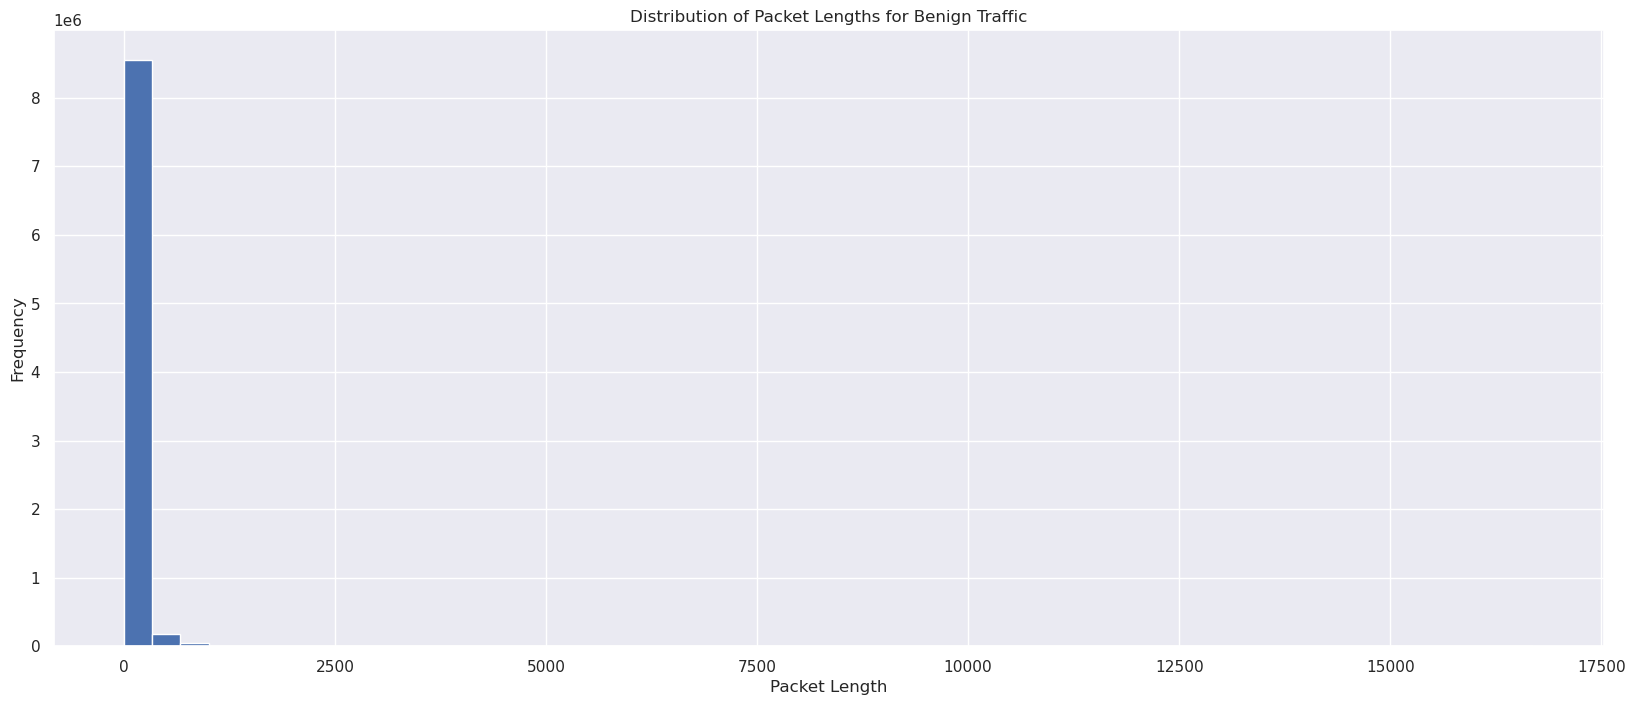

In [10]:
# Filter out only the benign traffic
df_benign = network_data[network_data["Label"] == "Benign"]

# Plot the distribution of packet lengths for benign traffic only
plt.hist(df_benign["Pkt Len Mean"], bins=50)
plt.title("Distribution of Packet Lengths for Benign Traffic")
plt.xlabel("Packet Length")
plt.ylabel("Frequency")
plt.show()

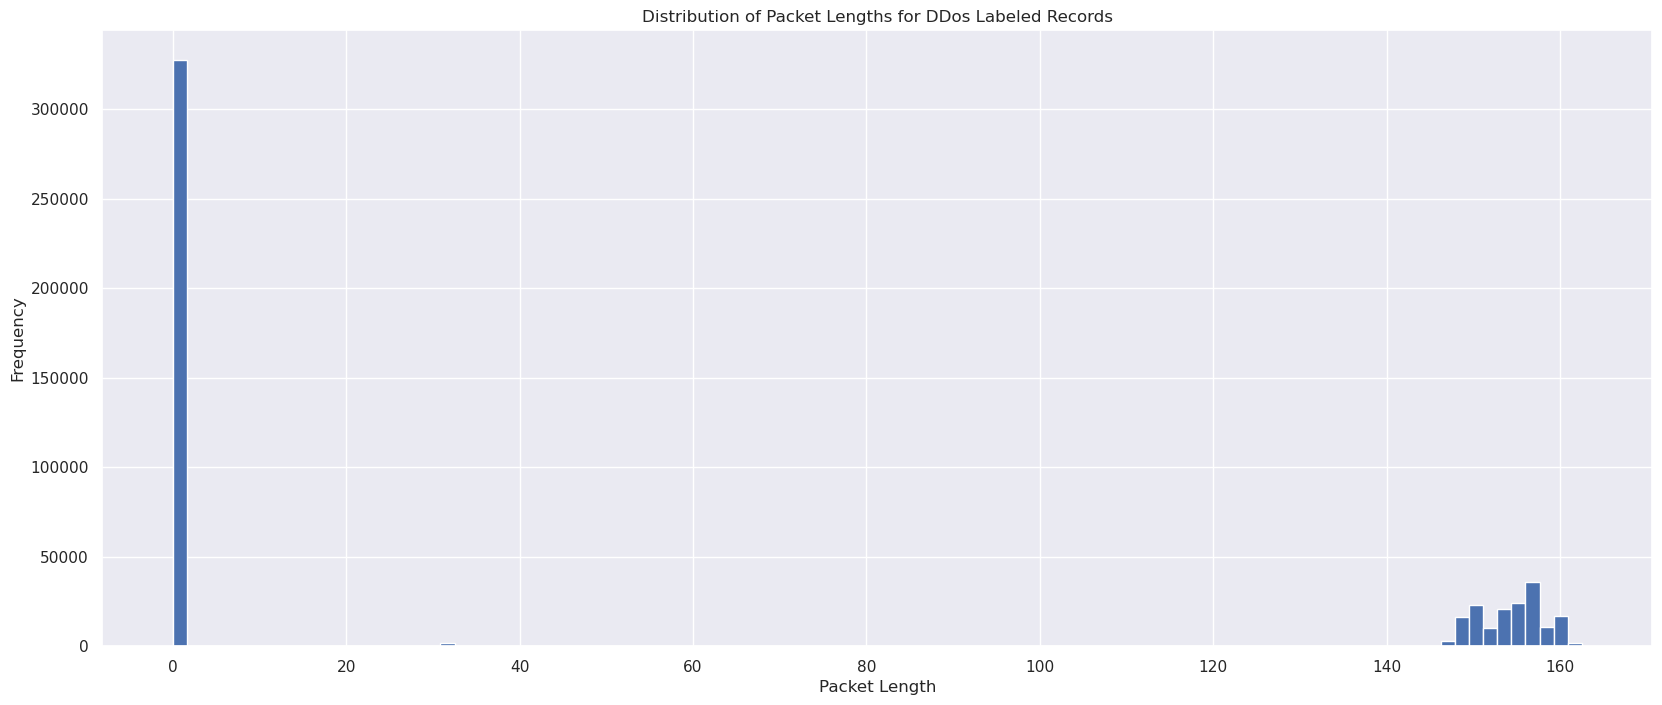

In [11]:
# filter the dataframe to include only records with labels containing the word "DDos"
df_ddos = network_data[network_data['Label'].str.contains('DDOS')]

# create a histogram of packet lengths for the filtered dataframe
plt.hist(df_ddos['Pkt Len Mean'], bins=100)
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Packet Lengths for DDos Labeled Records')
plt.show()

#### Packet Counts

/tmp/ipykernel_22143/117097964.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = network_data.groupby('Label')['Tot Fwd Pkts', 'Tot Bwd Pkts'].sum()


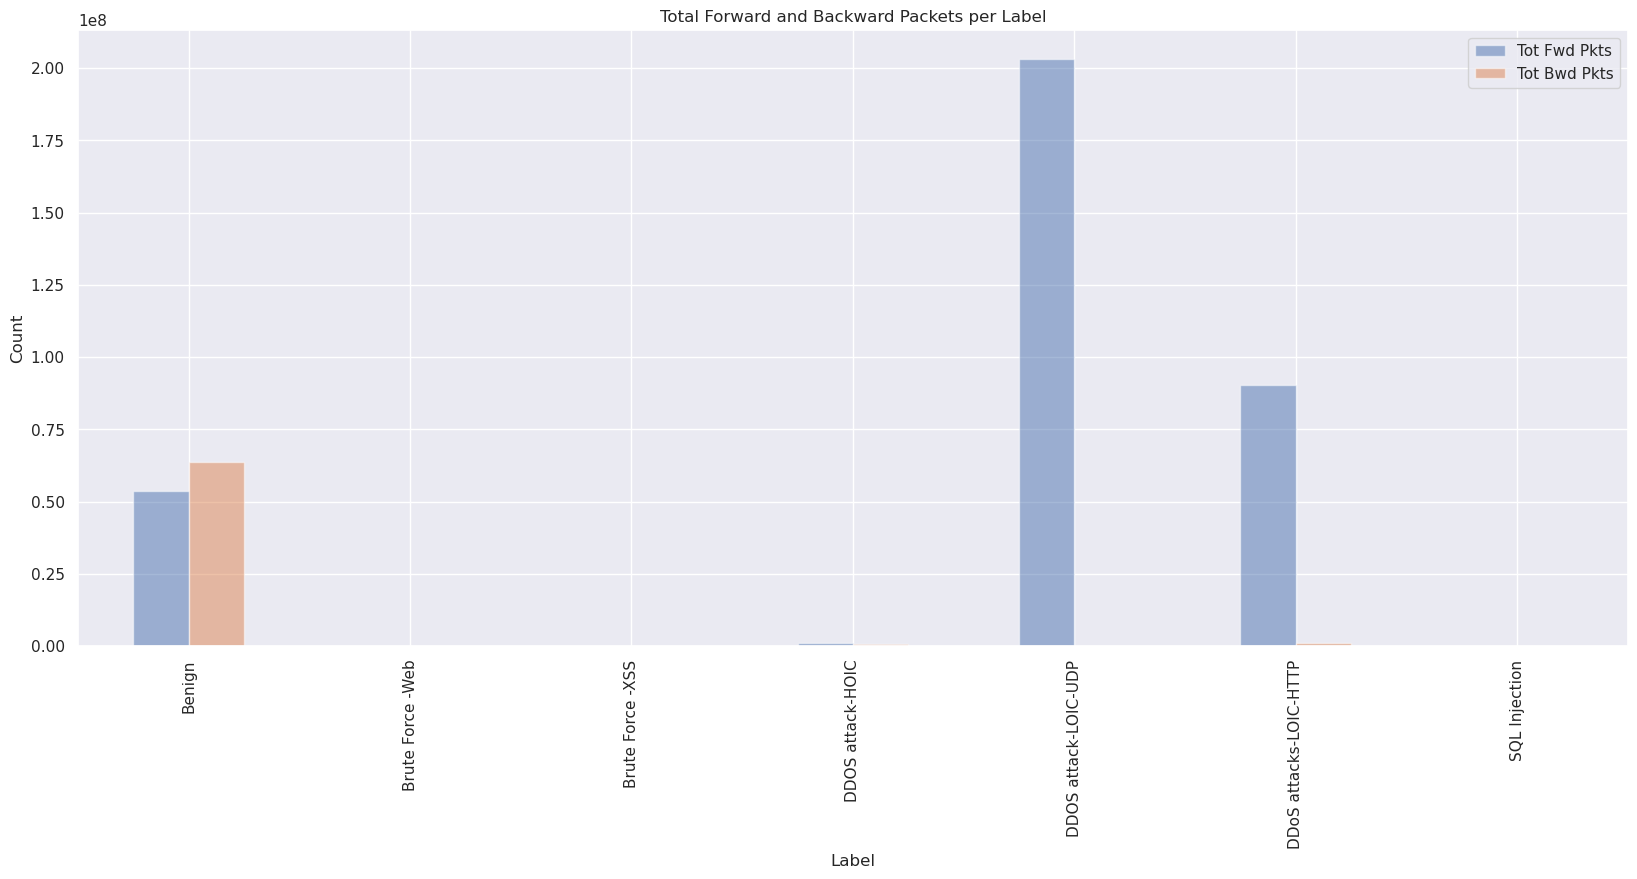

In [12]:
# Group by label and calculate the sum of total forward and backward packets
grouped = network_data.groupby('Label')['Tot Fwd Pkts', 'Tot Bwd Pkts'].sum()

# Plot the histograms
grouped.plot(kind='bar', alpha=0.5, legend=True)

# Set the labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Total Forward and Backward Packets per Label')

# Show the plot
plt.show()

/tmp/ipykernel_22143/2890848598.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = network_data[(~network_data['Label'].str.contains('DDOS', case=False)) & (network_data['Label'] != 'Benign')].groupby('Label')['Tot Fwd Pkts', 'Tot Bwd Pkts'].sum()


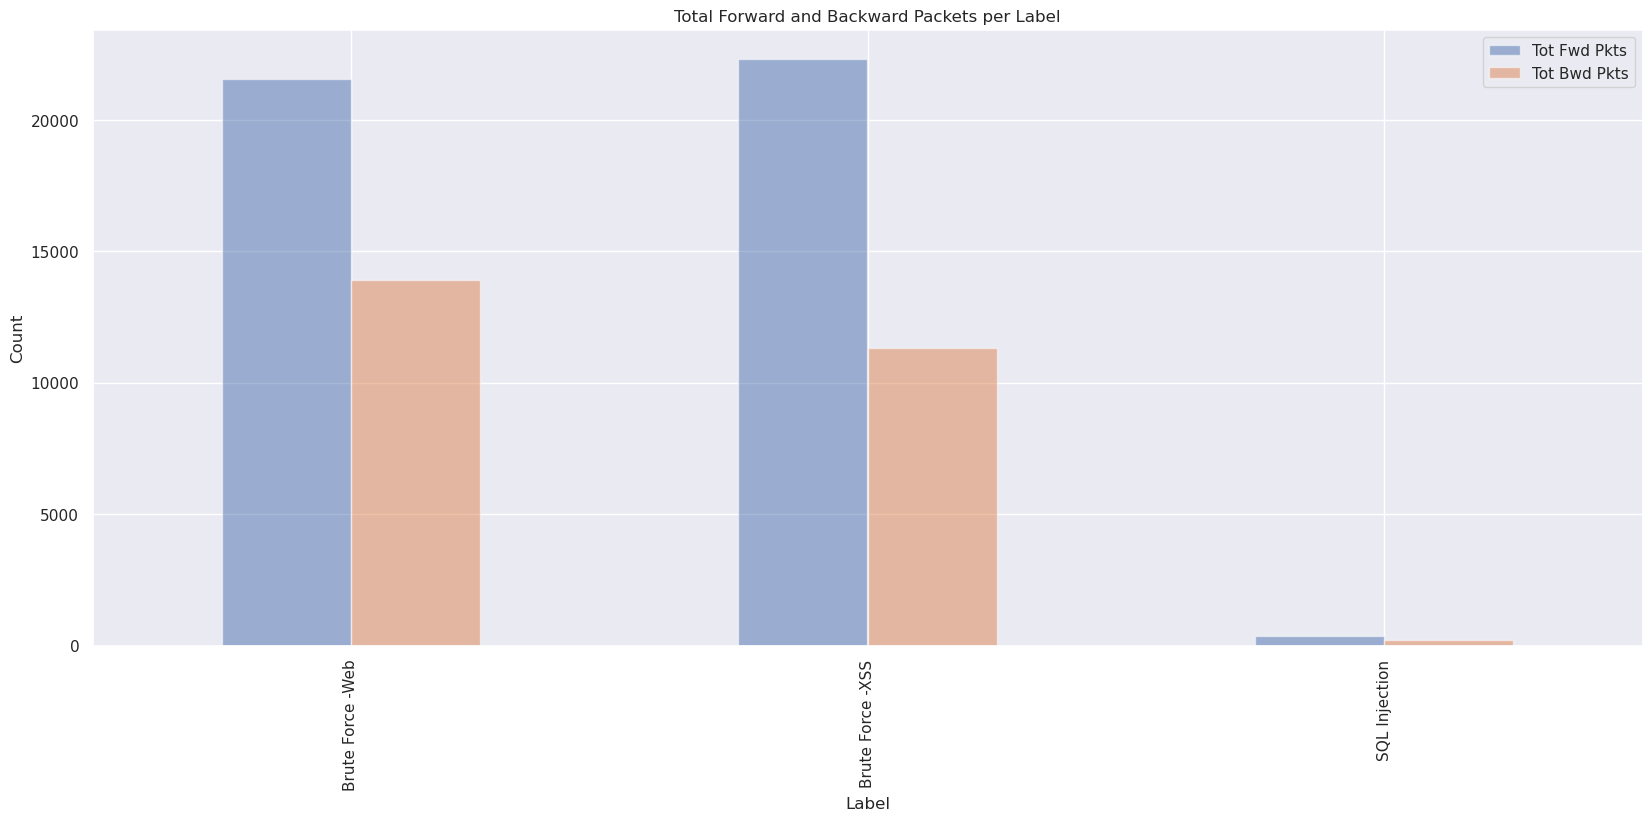

In [13]:
# Group by label and calculate the sum of total forward and backward packets
grouped = network_data[(~network_data['Label'].str.contains('DDOS', case=False)) & (network_data['Label'] != 'Benign')].groupby('Label')['Tot Fwd Pkts', 'Tot Bwd Pkts'].sum()

# Plot the histograms
grouped.plot(kind='bar', alpha=0.5, legend=True)

# Set the labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Total Forward and Backward Packets per Label')

# Show the plot
plt.show()

#### Average Rate

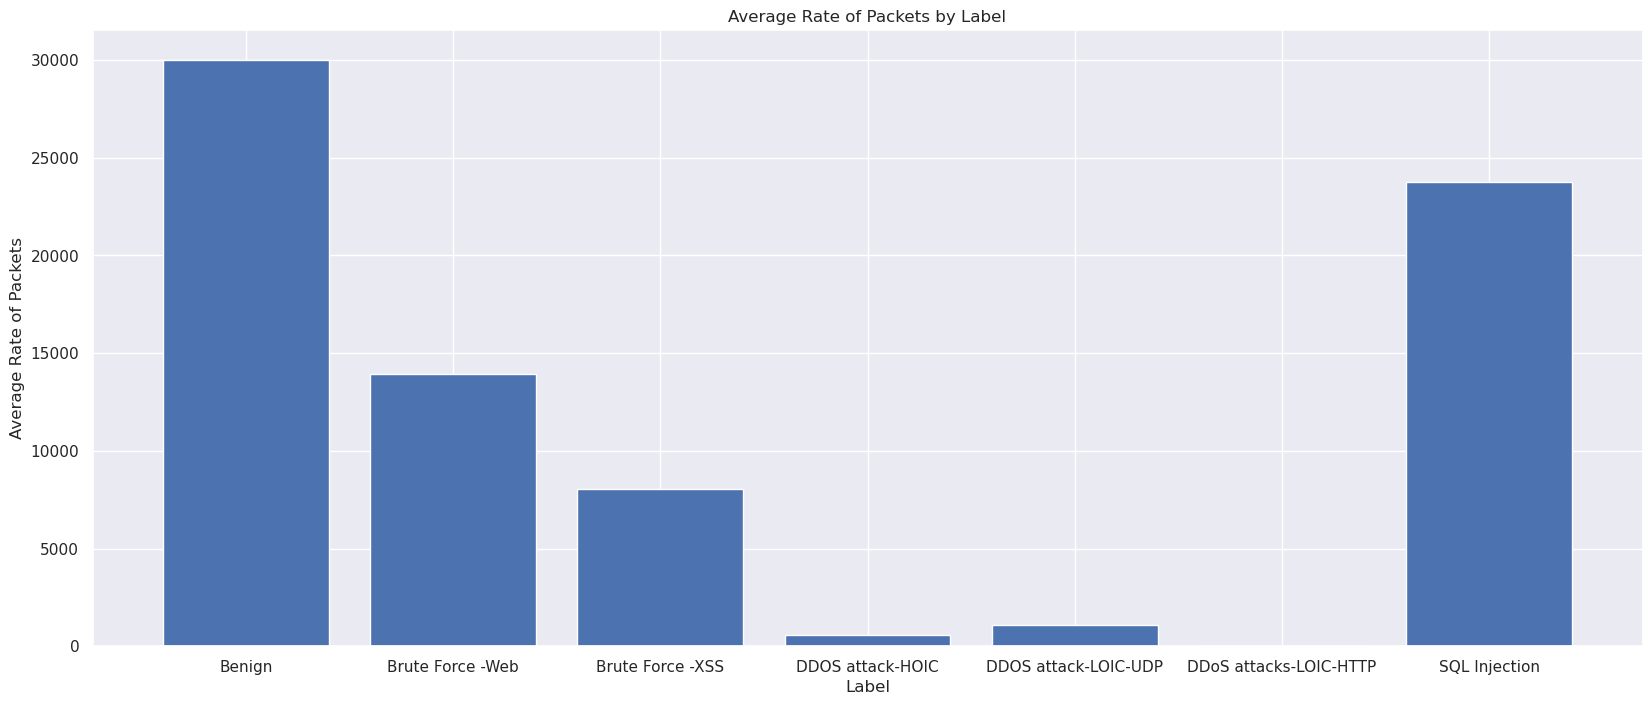

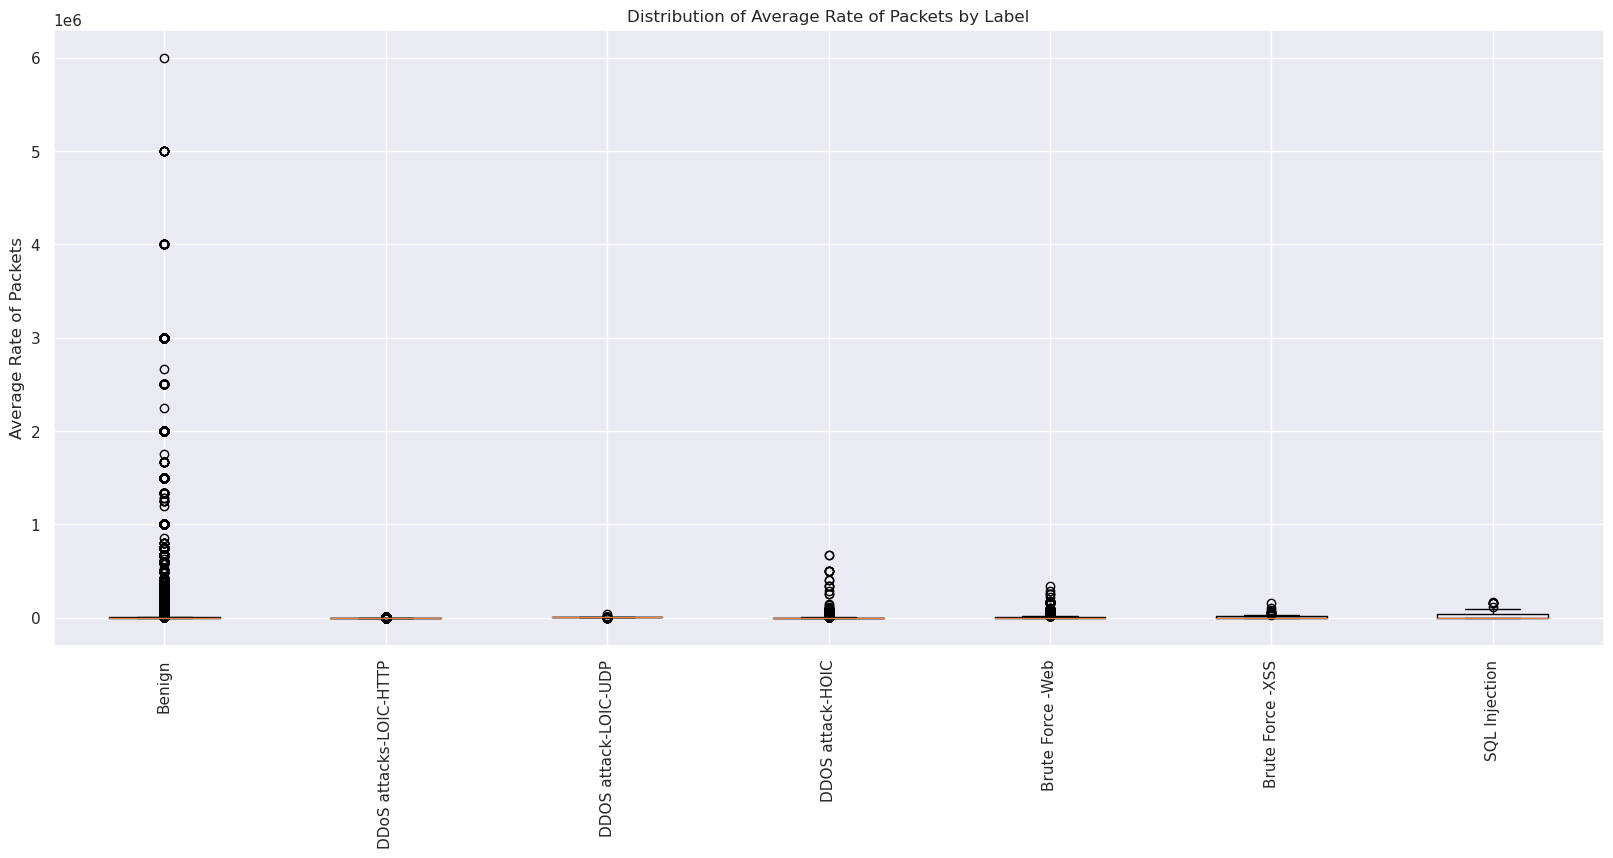

In [14]:
# Calculate the average rate of packets for each label
avg_rate = network_data.groupby("Label").mean()["Fwd Pkts/s"]

# Create a bar chart to visualize the average rate of packets for each label
plt.bar(avg_rate.index, avg_rate)
plt.title("Average Rate of Packets by Label")
plt.xlabel("Label")
plt.ylabel("Average Rate of Packets")
plt.show()

# Create a box plot to visualize the distribution of average rate of packets for each label
plt.boxplot([network_data[network_data["Label"] == label]["Fwd Pkts/s"] for label in network_data["Label"].unique()])
plt.title("Distribution of Average Rate of Packets by Label")
plt.xticks(range(1, len(network_data["Label"].unique()) + 1), network_data["Label"].unique(), rotation=90)
plt.ylabel("Average Rate of Packets")
plt.show()

## Flag Analysis

Information about flag counts, such as FIN, SYN, RST, PSH, ACK, URG, and ECE can help identify specific types of attacks, such as TCP SYN flooding,

<AxesSubplot:xlabel='Label', ylabel='Count'>

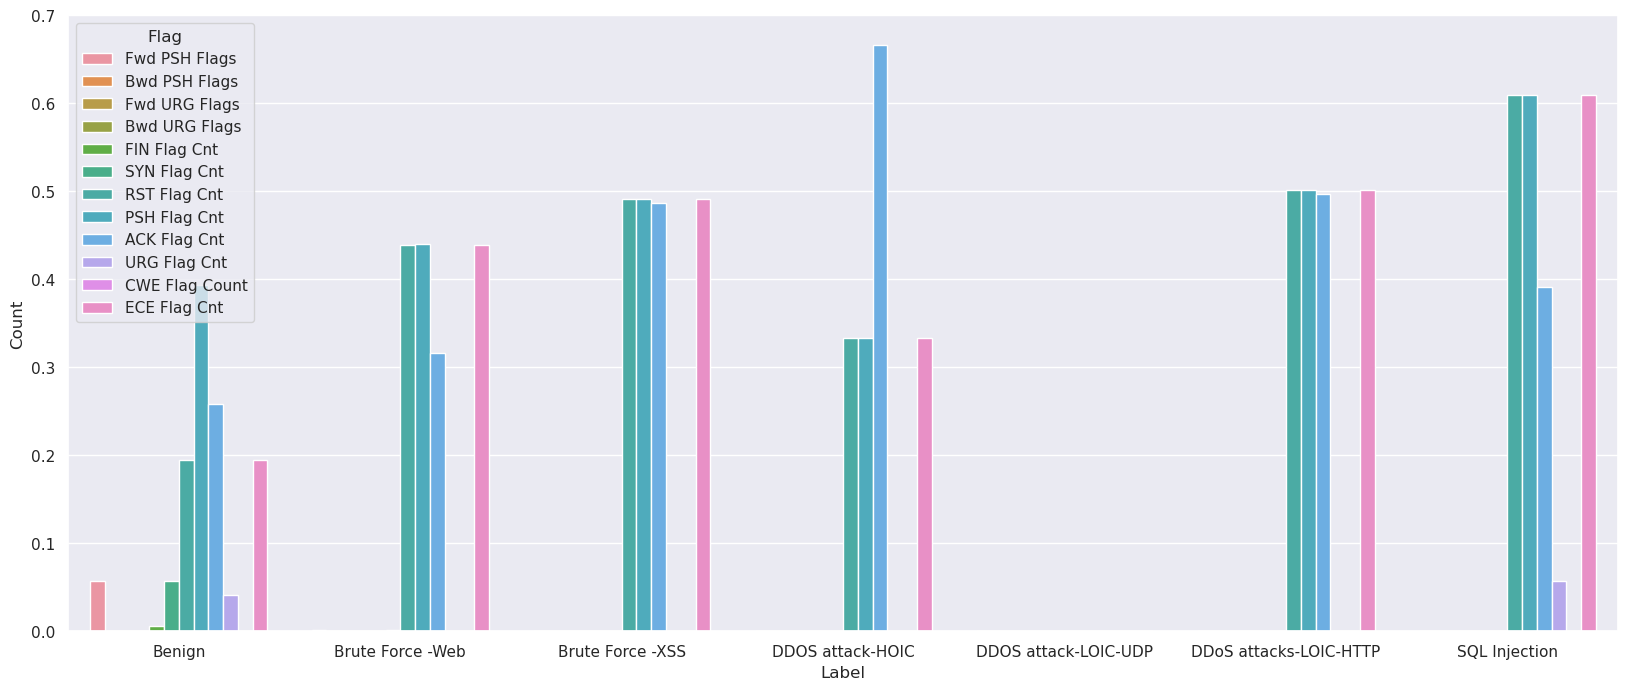

In [15]:
# Filter the columns containing the word 'flag'
flag_cols = [col for col in network_data.columns if 'Flag' in col]

# Calculate the average count of each flag for each label
avg_flag_counts = network_data.groupby('Label')[flag_cols].mean()

# Reshape the dataframe for plotting
avg_flag_counts = avg_flag_counts.reset_index().melt(id_vars='Label', var_name='Flag', value_name='Count')

# Plot the results using a barplot
sns.barplot(data=avg_flag_counts, x='Label', y='Count', hue='Flag')

## Flow Duration

Information on flow duration and idle time can help identify long-lived network connections that are potentially malicious or unwanted. 

#### Duration

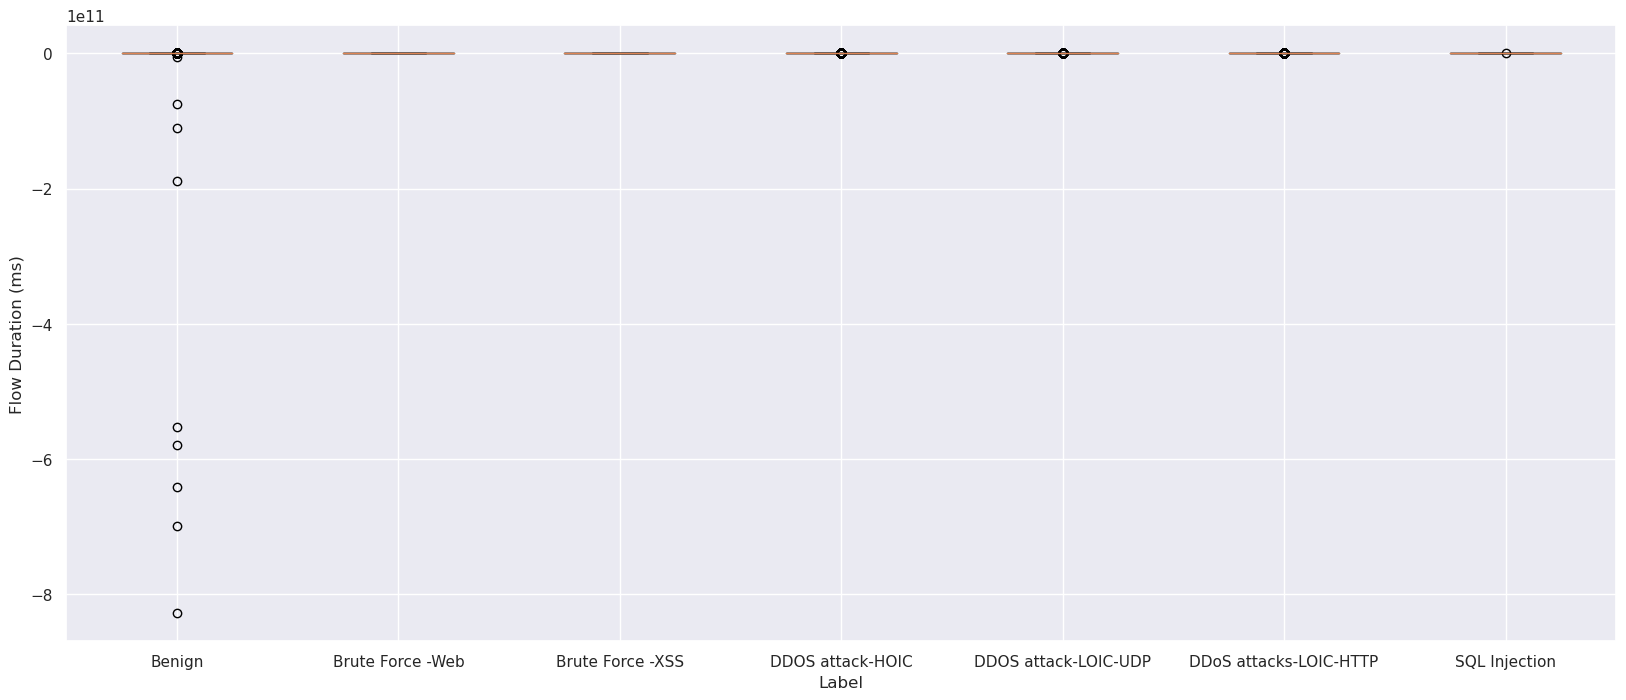

In [16]:
# Group by label and calculate the mean flow duration
label_mean_duration = network_data.groupby('Label')['Flow Duration'].mean()

# Plot the boxplot
plt.boxplot([network_data[network_data['Label'] == label]['Flow Duration'] for label in label_mean_duration.index],
            labels=label_mean_duration.index)
plt.xlabel('Label')
plt.ylabel('Flow Duration (ms)')
plt.show()

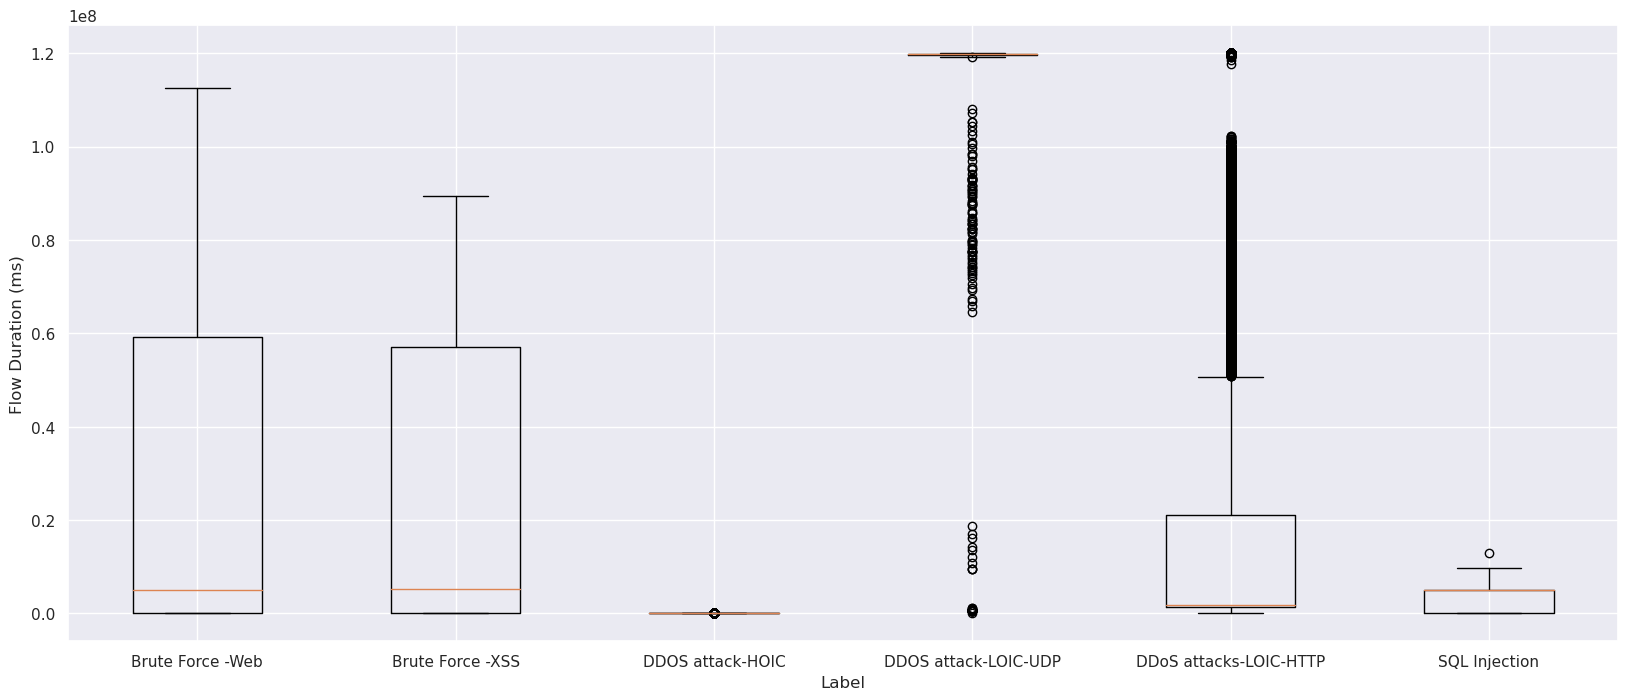

In [17]:
# Group by label and calculate the mean flow duration
label_mean_duration = network_data[network_data['Label'] != 'Benign'].groupby('Label')['Flow Duration'].mean()

# Plot the boxplot
plt.boxplot([network_data[network_data['Label'] == label]['Flow Duration'] for label in label_mean_duration.index],
            labels=label_mean_duration.index)
plt.xlabel('Label')
plt.ylabel('Flow Duration (ms)')
plt.show()

#### Idle Time

<AxesSubplot:xlabel='Label', ylabel='Idle Mean'>

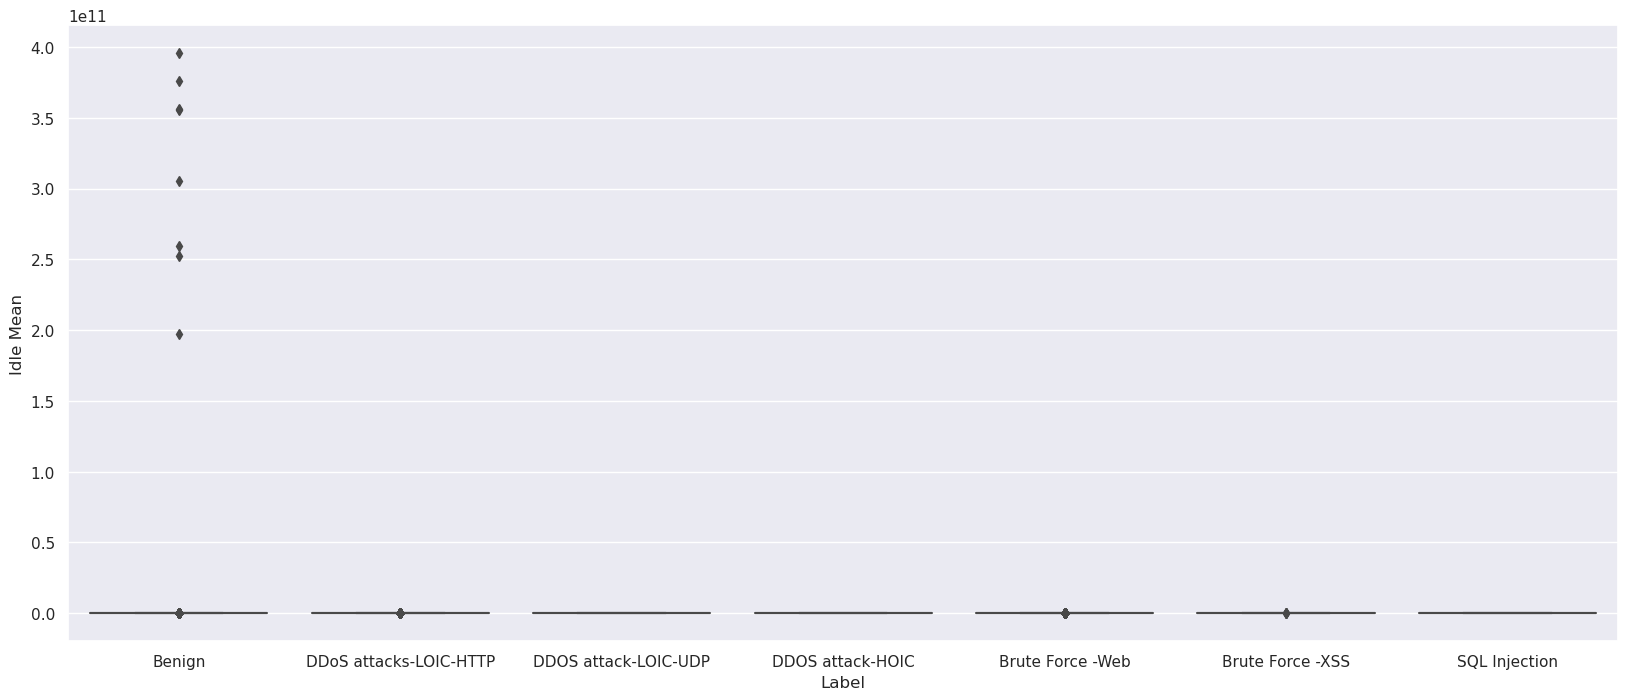

In [18]:
# create a box plot
sns.boxplot(x='Label', y='Idle Mean', data=network_data)

<AxesSubplot:xlabel='Label', ylabel='Idle Mean'>

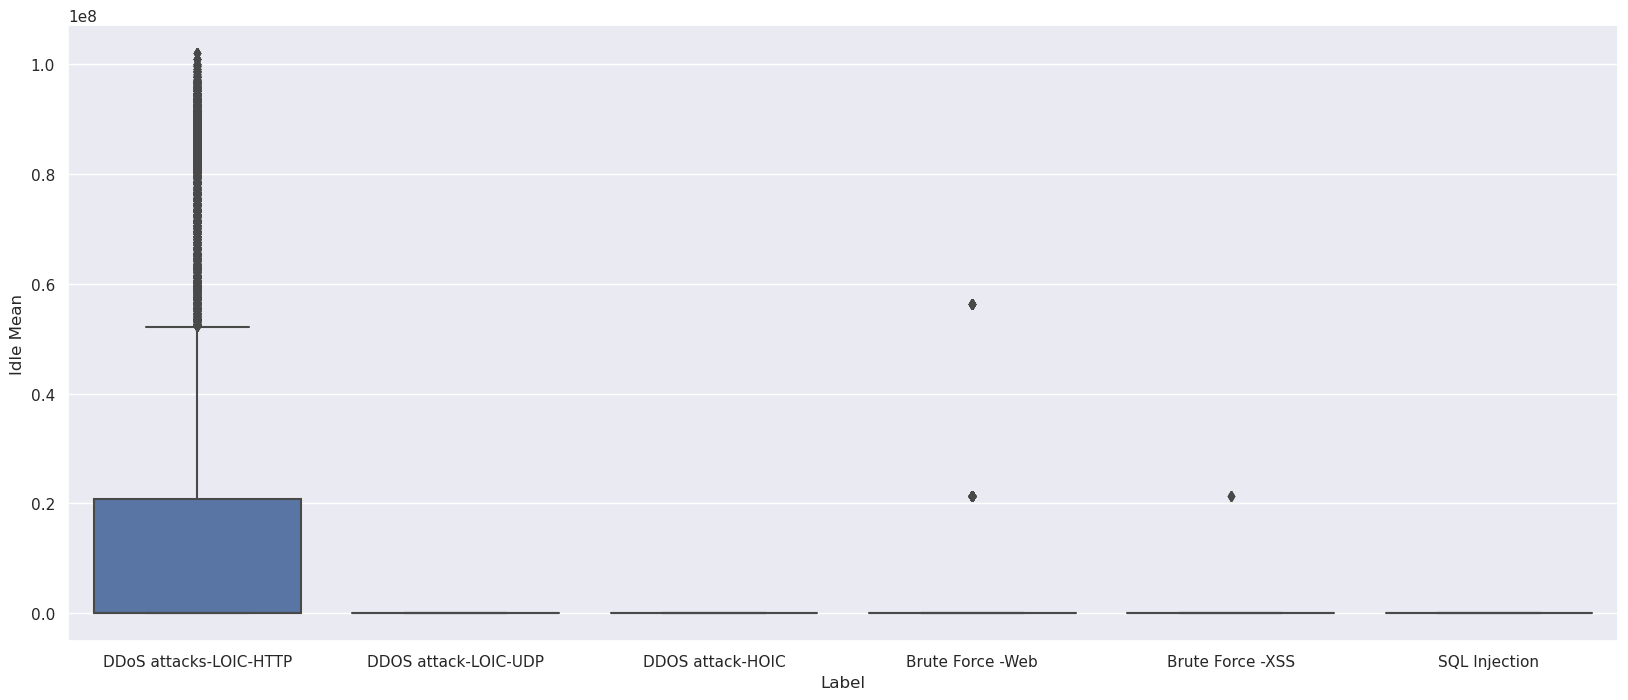

In [19]:
# create a box plot
sns.boxplot(x='Label', y='Idle Mean', data=network_data[network_data['Label'] != "Benign"])

## Features

features such as the flow's down/up ratio, subflow packet counts, and packet size variance can help identify and classify network traffic based on its directionality, which can be useful for monitoring and identifying suspicious behavior.

#### Down/Up Ratio

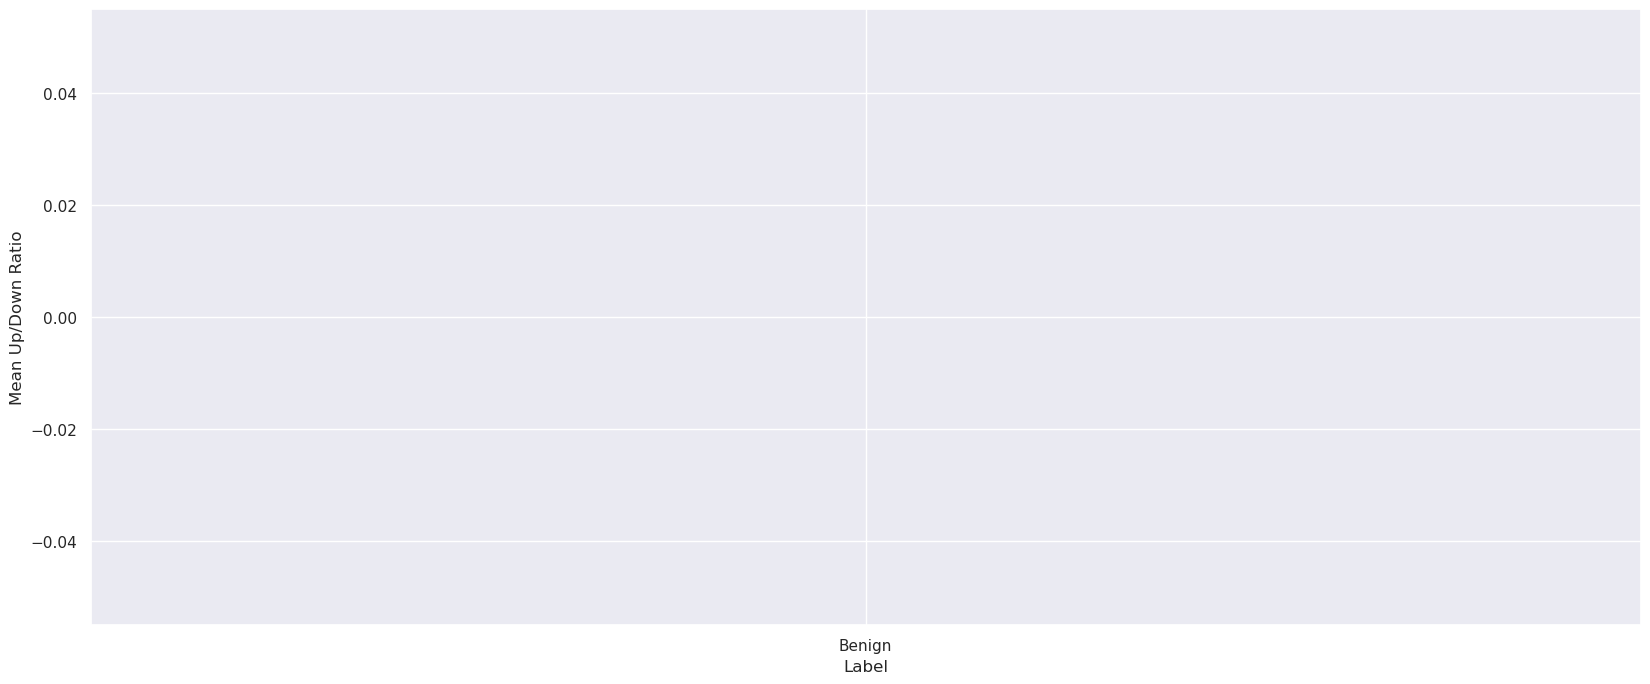

In [20]:
# Calculate the up/down ratio for each row
network_data["up_down_ratio"] = network_data["Tot Fwd Pkts"] / network_data["Tot Bwd Pkts"]

# Group the data by label and calculate the mean up/down ratio for each label
up_down_ratio_by_label = network_data.groupby("Label")["up_down_ratio"].mean()

# Plot the mean up/down ratio for each label using a bar chart
plt.bar(up_down_ratio_by_label.index, up_down_ratio_by_label.values)
plt.xlabel("Label")
plt.ylabel("Mean Up/Down Ratio")
plt.show()

#### SubFlow Packet Counts

<AxesSubplot:xlabel='Subflow Packets', ylabel='Direction'>

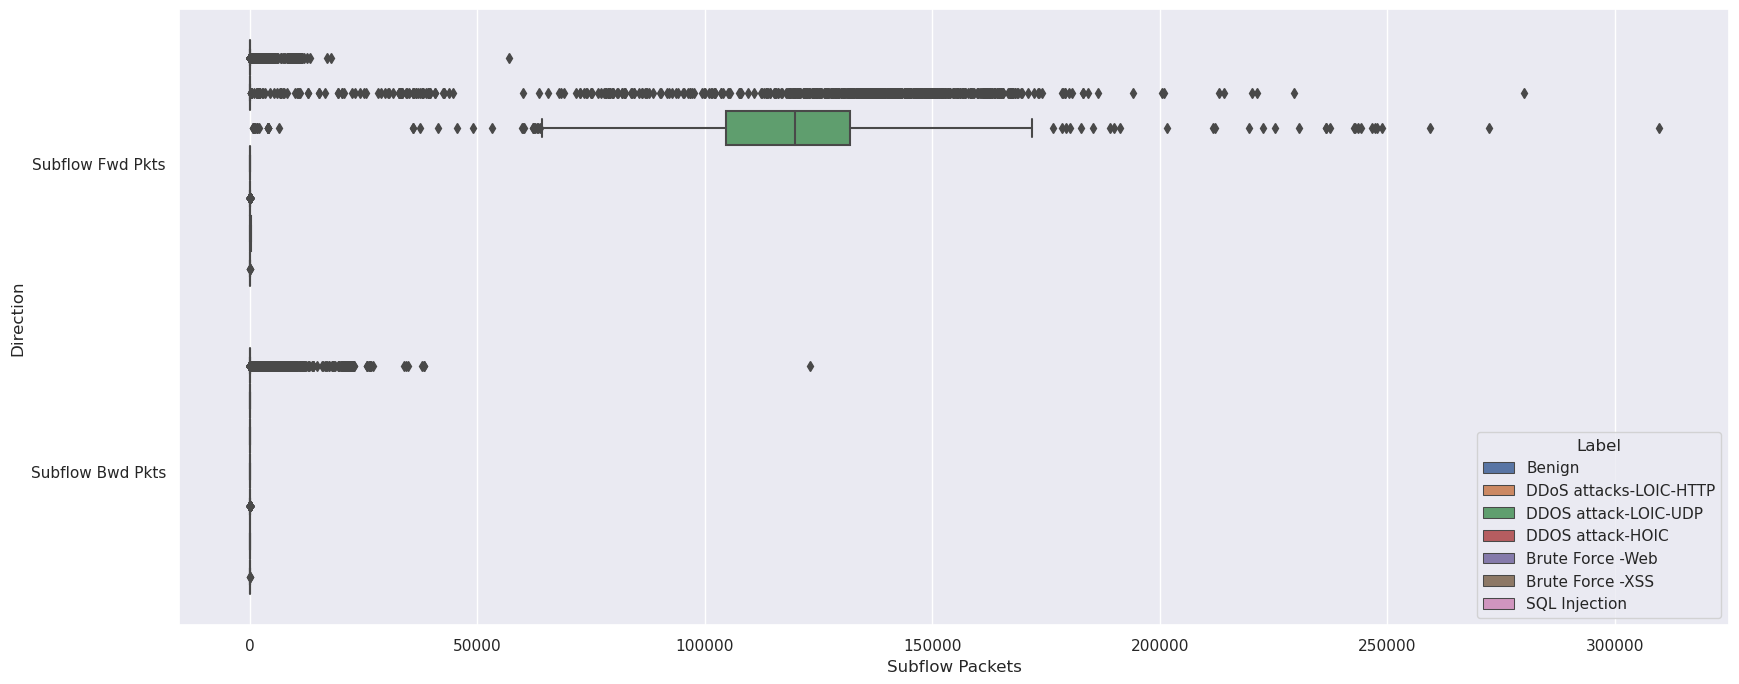

In [21]:
# Filter the data to only include the subflow packet count and label columns
subflow_df = network_data[['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Label']]

# Melt the DataFrame so that there is a separate row for each subflow packet count value
subflow_melted = pd.melt(subflow_df, id_vars=['Label'], value_vars=['Subflow Fwd Pkts', 'Subflow Bwd Pkts'], var_name='Direction', value_name='Subflow Packets')

# Create a boxplot using seaborn
sns.boxplot(x='Subflow Packets', y='Direction', hue='Label', data=subflow_melted)

#### Packet Size Variance

<AxesSubplot:xlabel='Label', ylabel='packet_size_variance'>

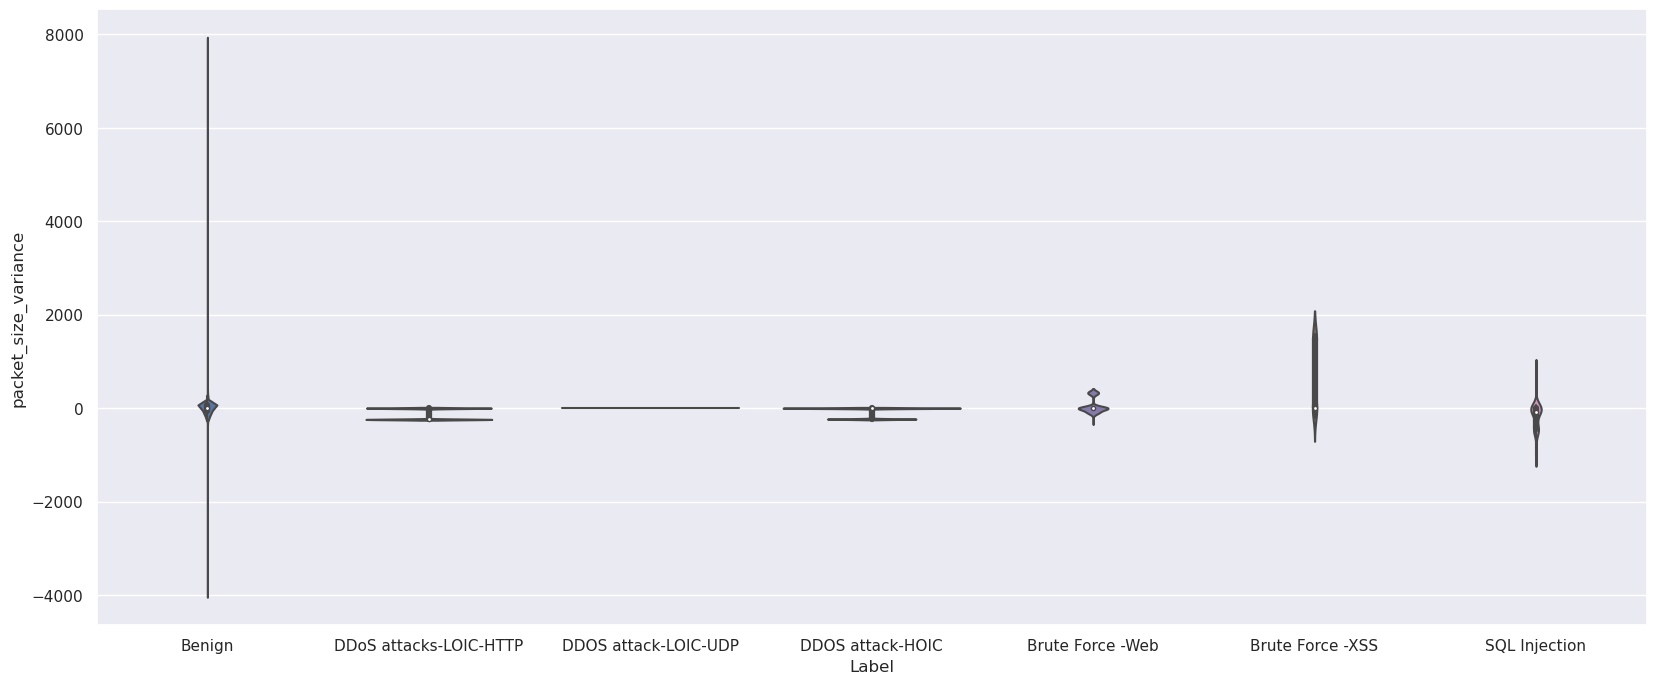

In [22]:
# Create a new column for packet size variance
network_data['packet_size_variance'] = network_data['Bwd Pkt Len Mean'] - network_data['Bwd Pkt Len Std']

# Create a violin plot of packet size variance by label
sns.violinplot(x='Label', y='packet_size_variance', data=network_data)

## CNN for Mork

#### Data Preprocessing

In [23]:
# check for some null or missing values in our dataset
network_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
# drop null or missing columns
network_data = network_data.dropna()
network_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Encoding Categorical Data

In [25]:
network_data['Label'].unique()

array(['Benign', 'DDoS attacks-LOIC-HTTP', 'DDOS attack-LOIC-UDP',
       'DDOS attack-HOIC', 'Brute Force -Web', 'Brute Force -XSS',
       'SQL Injection'], dtype=object)

In [26]:
# encode the column labels
label_encoder = LabelEncoder()
network_data['Label']= label_encoder.fit_transform(network_data['Label'])
network_data['Label'].unique()

array([0, 5, 4, 3, 1, 2, 6])

In [27]:
# check for encoded labels
network_data['Label'].value_counts()

0    8783574
5     576191
3     491439
4       1730
1        611
2        230
6         87
Name: Label, dtype: int64

#### Shaping Data

In [28]:
# make 3 seperate datasets for 3 feature labels
data_1 = network_data[network_data['Label'] == 0]
data_2 = network_data[network_data['Label'] == 1]
data_3 = network_data[network_data['Label'] == 2]
data_4 = network_data[network_data['Label'] == 3]
data_5 = network_data[network_data['Label'] == 4]
data_6 = network_data[network_data['Label'] == 5]


# make benign feature
y_1 = np.zeros(data_1.shape[0])
y_benign = pd.DataFrame(y_1)

# make Brute Force-Web feature
y_2 = np.ones(data_2.shape[0])
y_bf = pd.DataFrame(y_2)

# make Brute Force-XSS feature
y_3 = np.full(data_3.shape[0], 2)
y_xss = pd.DataFrame(y_3)

# make DDOS-HOICE feature
y_4 = np.full(data_4.shape[0], 3)
y_ddos = pd.DataFrame(y_4)

# make DDOS-LOIC feature
y_5 = np.full(data_5.shape[0], 4)
y_loic = pd.DataFrame(y_5)

# make SQL Injection feature
y_6 = np.full(data_6.shape[0], 5)
y_sql = pd.DataFrame(y_6)

# merging the original dataframe
X = pd.concat([data_1, data_2, data_3, data_4, data_5, data_6], sort=True)
y = pd.concat([y_benign, y_bf, y_xss, y_ddos, y_loic, y_sql], sort=True)

print(X.shape)
print(y.shape)

(9853775, 86)
(9853775, 1)


#### Data Augmentation

In [29]:
from sklearn.utils import resample

data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=20000, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=20000, 
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=20000, 
                           random_state=123, replace=True)

train_dataset = pd.concat([data_1_resample, data_2_resample, data_3_resample, data_4_resample, data_5_resample, data_6_resample])
train_dataset.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,up_down_ratio,packet_size_variance
5544125,172.31.68.5-104.28.20.184-52409-443-6,104.28.20.184,443.0,172.31.68.5,52409,6,20/02/2018 04:19:46,1540,2,1,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,2.000000,0.000000
491713,0,0,0.0,0,445,6,23/02/2018 02:52:54,92262698,2,2,...,0.000000,259351.0,259351.0,9.200335e+07,0.000000e+00,92003347.0,92003347.0,0,1.000000,0.000000
4798525,172.31.67.37-23.196.113.171-53922-443-6,172.31.67.37,53922.0,23.196.113.171,443,6,20/02/2018 02:33:52,116062686,19,16,...,64349.109056,253283.0,30300.0,9.622940e+06,1.293197e+06,10000725.0,5516720.0,0,1.187500,-86.922908
1817243,172.31.0.2-172.31.67.63-53-56560-17,172.31.67.63,56560.0,172.31.0.2,53,17,20/02/2018 10:40:15,1659,1,1,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1.000000,302.000000
2867621,162.242.237.105-172.31.65.121-58068-3389-6,162.242.237.105,58068.0,172.31.65.121,3389,6,20/02/2018 03:34:15,3188861,13,7,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1.857143,-204.241462


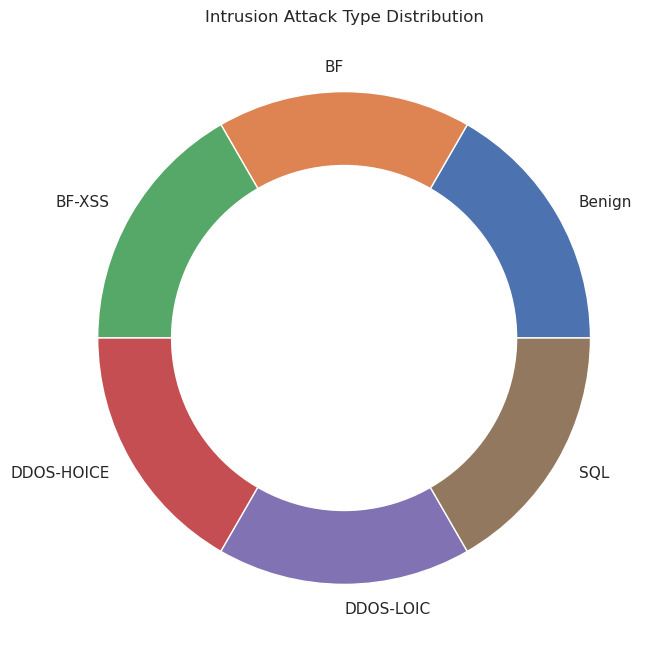

In [30]:
# viewing the distribution of intrusion attacks in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(train_dataset['Label'].value_counts(), labels=['Benign', 'BF', 'BF-XSS', 'DDOS-HOICE', 'DDOS-LOIC', 'SQL'])
p = plt.gcf()
p.gca().add_artist(circle)

#### Test-Train Split

In [31]:
test_dataset = train_dataset.sample(frac=0.1)
target_train = train_dataset['Label']
target_test = test_dataset['Label']
target_train.unique(), target_test.unique()

(array([0, 1, 2, 3, 4, 5]), array([1, 4, 3, 0, 2, 5]))

In [32]:
y_train = to_categorical(target_train, num_classes=6)
y_test = to_categorical(target_test, num_classes=6)

#### Data Splicing

In [33]:
train_dataset = train_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)
test_dataset = test_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)

In [34]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values
X_test

array([[0, 0, 0.0, ..., 41990386.0, 7200406.0, inf],
       [0, 0, 0.0, ..., 0.0, 0.0, inf],
       [0, 0, 0.0, ..., 0.0, 0.0, inf],
       ...,
       [0, 0, 0.0, ..., 0.0, 0.0, inf],
       [0, 0, 0.0, ..., 0.0, 0.0, inf],
       [0, 0, 0.0, ..., 0.0, 0.0, inf]], dtype=object)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120000, 78)
(12000, 78)
(120000, 6)
(12000, 6)


In [36]:
# reshape the data for CNN
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((120000, 78, 1), (12000, 78, 1))

In [37]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [38]:
model = model()
model.summary()

2023-04-14 21:37:17.346806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 21:37:17.347016: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 72, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 72, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 36, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 36, 64)           256       
 hNormalization)                                                 
                                                        

In [39]:
his = model.fit(X_train, y_train, epochs=30, batch_size=32, 
          validation_data=(X_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

#### Visualization of Results

In [ ]:
# check the model performance on test data
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_name))

In [ ]:
# check history of model
history = his.history
history.keys()

In [ ]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()